# NEM DATA CHALLENGE
## Data Analysis Code 

In [2]:
%matplotlib notebook
import os
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.api as sm
from scipy.interpolate import UnivariateSpline


In [2]:
# see the pre-defined styles provided.
#plt.style.available

In [3]:
def read_csv_file_old():
    '''read dataset10Min.csv'''

    in_path  = (r'.\OUT0PUT')
    in_file = 'datasets10Min.csv'
    in_csv = os.path.join(in_path,in_file)
    df = pd.read_csv(in_csv, 
                     index_col = 'datetime',
                     parse_dates=True, 
                     infer_datetime_format=True)
    df = df[sensor_list()] # reorder columns according to sensor list
    df1 = df[df.asset=='A001']
    df2 = df[df.asset=='A002']
    df3 = df[df.asset=='A003']
    df4 = df[df.asset=='A004']
    df5 = df[df.asset=='A005']
    return df,df1,df2,df3,df4,df5    

In [10]:
def read_csv_file():
    ''' read dataset10Min.csv'''

    in_path  = (r'C:\Home00Ser\Python\NEM Challenge\Fase1\datasets\OUTPUT')
    in_file = 'datasets10Min.csv'
    
    #in_path  = (r'.\FTP Files')
    #in_file = 'datasets10Min.csv'    
    
    #in_path  = (r'.\FTP Files')
    #in_file = 'Data_assets_10m.csv'    
    
    
    in_csv = os.path.join(in_path,in_file)
    df = pd.read_csv(in_csv)
    indx =df.timestamp[df.timestamp==1433116800].index # index positions where datetime= 1433116800
    df.loc[indx,'timestamp']=1433116800-1 # subtract one second to avoid date 01-06-2015
    df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
    df.set_index('timestamp', drop=True, inplace=True)
    df = df[sensor_list()] # reorder columns according to sensor list
    df1 = df[df.asset=='A001']
    df2 = df[df.asset=='A002']
    df3 = df[df.asset=='A003']
    df4 = df[df.asset=='A004']
    df5 = df[df.asset=='A005']
    return df,df1,df2,df3,df4,df5   

In [4]:
def sensor_list():
        NAC = ['WNACWindSpeed','WNACDirection','WNACWindDirection','WNACAmbTemp','WNACNacelleTemp']
        GEN = ['WGENPhase1Temp','WGENPhase2Temp','WGENPhase3Temp',
               'WGENGenSpeed','WGENBearNDETemp','WGENBearDETemp']
        ROT = ['WROTPitchAngleSP','WROTSpeed','WROTPitchAngleAvg']
        GDC = ['WGDCTrafoPhase1Temp','WGDCTrafoPhase2Temp','WGDCTrafoPhase3Temp']
        TUR = ['WTURReactivePower','WTURReactivePowerAux','WTURPowerAux','WTURPower']
        HDR = ['WHDRGroupOilPress','WHDRGroupOilTemp']
        TRM = ['WTRMOilTemp','WTRMBearTemp'] 
        YAW = ['WYAWPressure']
        CNV = ['WCNVCosPhi','WCNVNetVoltage'] #converter
        cols = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW+CNV+['asset']
        return cols

In [11]:
cwd = r'C:\Home00Ser\Python\NEM Challenge'
os.chdir(cwd)
dfall,df1,df2,df3,df4,df5 = read_csv_file()
df6 = dfall.groupby(dfall.index).mean()

In [12]:
dfall.head()

,WNACWindSpeed,WNACDirection,WNACWindDirection,WNACAmbTemp,WNACNacelleTemp,WGENPhase1Temp,WGENPhase2Temp,WGENPhase3Temp,WGENGenSpeed,WGENBearNDETemp,...,WTURPowerAux,WTURPower,WHDRGroupOilPress,WHDRGroupOilTemp,WTRMOilTemp,WTRMBearTemp,WYAWPressure,WCNVCosPhi,WCNVNetVoltage,asset
timestamp,,,,,,,,,,,,,,,,,,,,,
2015-05-01 00:10:00,0.232705,0.632365,0.034610,0.352273,0.564973,0.670345,0.678605,0.678450,0.925665,0.575171,...,-0.006425,0.484594,0.946188,0.499482,0.734519,0.804736,0.968385,0.987495,62.760000,A001
2015-05-01 00:20:00,0.240519,0.636720,-0.193071,0.348559,0.562886,0.665521,0.674164,0.673801,0.929502,0.580992,...,-0.006494,0.499054,0.947391,0.500185,0.726352,0.797588,1.006540,0.988017,62.814865,A001
2015-05-01 00:30:00,0.236233,0.636720,-0.063975,0.345775,0.563298,0.662782,0.671611,0.670917,0.932675,0.583763,...,-0.006485,0.498477,0.945406,0.501745,0.720991,0.794025,1.006919,0.988010,62.831740,A001
2015-05-01 00:40:00,0.240962,0.636720,-0.217021,0.343308,0.558239,0.666791,0.675750,0.675346,0.932404,0.584794,...,-0.006270,0.500386,0.946720,0.501841,0.721356,0.794318,1.007420,0.988437,62.902396,A001
2015-05-01 00:50:00,0.228353,0.636720,-0.159086,0.340779,0.571563,0.658676,0.667582,0.667434,0.902527,0.585500,...,-0.005621,0.429755,0.946798,0.502408,0.738411,0.791293,1.007043,0.985260,62.843958,A001


In [13]:
dfd= dfall.groupby('asset').resample('D').mean()
dfd.reset_index(level=['asset'], inplace=True)
dfd1 = dfd[dfd.asset=='A001']
dfd2 = dfd[dfd.asset=='A002']
dfd3 = dfd[dfd.asset=='A003']
dfd4 = dfd[dfd.asset=='A004']
dfd5 = dfd[dfd.asset=='A005']
dfd6 = dfd.groupby(dfd.index).mean()

### correlation Matrix

In [15]:
dfc=df3.corr()
x= 0.4
dfc = dfc[(dfc>=x)& (dfc<1)|(dfc<=-x)&(dfc>-1)]
dfc = dfc.dropna(axis=0, how='all')
dfc = dfc.dropna(axis=1, how='all')
dfc

,WNACWindSpeed,WNACDirection,WNACAmbTemp,WNACNacelleTemp,WGENPhase1Temp,WGENPhase2Temp,WGENPhase3Temp,WGENGenSpeed,WGENBearNDETemp,WGENBearDETemp,...,WGDCTrafoPhase3Temp,WTURReactivePower,WTURReactivePowerAux,WTURPowerAux,WTURPower,WHDRGroupOilPress,WHDRGroupOilTemp,WTRMOilTemp,WTRMBearTemp,WCNVCosPhi
WNACWindSpeed,NaN,NaN,NaN,NaN,0.773768,0.791764,0.785324,0.875848,0.479133,NaN,...,0.671429,-0.720035,-0.702387,-0.688763,0.943556,0.465105,NaN,0.775938,0.767146,0.770276
WNACDirection,NaN,NaN,NaN,0.424069,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WNACAmbTemp,NaN,NaN,NaN,0.934670,NaN,NaN,NaN,NaN,0.540038,0.762772,...,NaN,NaN,NaN,NaN,NaN,NaN,0.859670,NaN,NaN,NaN
WNACNacelleTemp,NaN,0.424069,0.934670,NaN,NaN,NaN,NaN,NaN,0.465944,0.753939,...,NaN,NaN,NaN,NaN,-0.415890,NaN,0.851315,NaN,NaN,NaN
WGENPhase1Temp,0.773768,NaN,NaN,NaN,NaN,0.998152,0.998450,0.724168,0.821449,0.533138,...,0.527912,-0.613972,-0.657841,-0.613075,0.723928,0.428770,NaN,0.613674,0.728988,0.668032
WGENPhase2Temp,0.791764,NaN,NaN,NaN,0.998152,NaN,0.999340,0.736275,0.824943,0.537060,...,0.549529,-0.616132,-0.665329,-0.627638,0.748022,0.433814,NaN,0.634272,0.743051,0.668207
WGENPhase3Temp,0.785324,NaN,NaN,NaN,0.998450,0.999340,NaN,0.732566,0.828424,0.540719,...,0.546141,-0.614537,-0.667684,-0.628265,0.739329,0.433070,NaN,0.628523,0.742080,0.667642
WGENGenSpeed,0.875848,NaN,NaN,NaN,0.724168,0.736275,0.732566,NaN,0.443253,NaN,...,0.591723,-0.861999,-0.671741,-0.594603,0.832524,0.416333,NaN,0.768897,0.859968,0.844041
WGENBearNDETemp,0.479133,NaN,0.540038,0.465944,0.821449,0.824943,0.828424,0.443253,NaN,0.890841,...,NaN,NaN,-0.503356,-0.484080,0.417112,NaN,0.655987,0.454285,0.624003,0.413603
WGENBearDETemp,NaN,NaN,0.762772,0.753939,0.533138,0.537060,0.540719,NaN,0.890841,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.826844,NaN,0.425752,NaN


In [16]:
HCOR = ['WNACWindSpeed','WGENGenSpeed', 'WGENPhase1Temp','WROTSpeed','WTURPower','WTURReactivePower','WCNVCosPhi'  ]
NAC = ['WNACWindSpeed','WNACDirection','WNACWindDirection','WNACAmbTemp','WNACNacelleTemp']
GEN = ['WGENPhase1Temp','WGENPhase2Temp','WGENPhase3Temp',
        'WGENGenSpeed','WGENBearNDETemp','WGENBearDETemp']
ROT = ['WROTPitchAngleSP','WROTSpeed','WROTPitchAngleAvg']
GDC = ['WGDCTrafoPhase1Temp','WGDCTrafoPhase2Temp','WGDCTrafoPhase3Temp']
TUR = ['WTURReactivePower','WTURReactivePowerAux','WTURPowerAux','WTURPower']
HDR = ['WHDRGroupOilPress','WHDRGroupOilTemp']
TRM = ['WTRMOilTemp','WTRMBearTemp']
YAW = ['WYAWPressure']
CNV = ['WCNVCosPhi','WCNVNetVoltage']
TEMPS = ['WNACAmbTemp','WNACNacelleTemp','WGENPhase1Temp','WGENBearNDETemp','WGENBearDETemp', 
         'WGDCTrafoPhase1Temp','WHDRGroupOilTemp' ,'WTRMOilTemp','WTRMBearTemp' ]
ALL = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW+CNV+['asset']
ALL2 = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW+CNV
LIS = ['WNACWindSpeed','WTURPower','WROTSpeed']
ASS = ['asset']

In [17]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
WNACWindSpeed,4452.0,0.193114,0.076362,0.011210,0.136039,0.196186,0.246358,0.590224
WNACDirection,4452.0,0.394825,0.285229,0.003040,0.102000,0.460500,0.625022,0.994360
WNACWindDirection,4452.0,0.008958,0.345455,-3.213899,-0.090237,0.002794,0.100557,5.476223
WNACAmbTemp,4452.0,0.394756,0.141298,0.140542,0.287838,0.382657,0.499856,0.756357
WNACNacelleTemp,4452.0,0.597961,0.123595,0.313596,0.507184,0.591563,0.682042,0.891775
WGENPhase1Temp,4452.0,0.602213,0.080696,0.339157,0.561539,0.599576,0.646714,0.872287
WGENPhase2Temp,4452.0,0.611524,0.082969,0.338857,0.570557,0.608736,0.656669,0.887717
WGENPhase3Temp,4452.0,0.612170,0.083394,0.337666,0.571531,0.609389,0.658104,0.905412
WGENGenSpeed,4452.0,0.751444,0.206549,-0.046519,0.601994,0.784530,0.940981,0.961791
WGENBearNDETemp,4452.0,0.554558,0.056942,0.343324,0.517710,0.556645,0.593154,0.749401


In [27]:
mystyle()

### MISSING VALUES IN FILES

In [ ]:
df=dfall
nans= pd.isnull(df).any(1).nonzero()[0]
nansx = df.index[nans]
print(len(nansx))
nansx

<IPython.core.display.Javascript object>


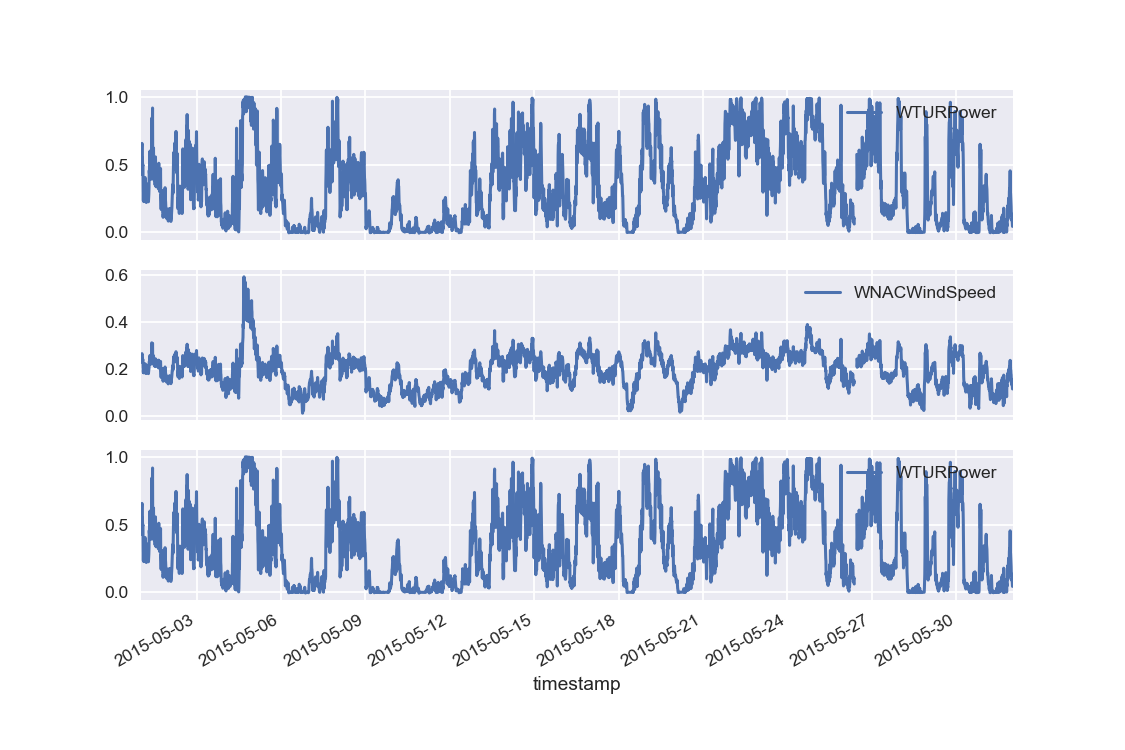

In [18]:
df = df1.copy()
col1 = ['WTURPower']
col2 = ['WNACWindSpeed']
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(9,6) )
df[col1].plot( ax=ax1)
df[col2].plot( ax=ax2)
df[col1].plot( ax=ax3)


<IPython.core.display.Javascript object>


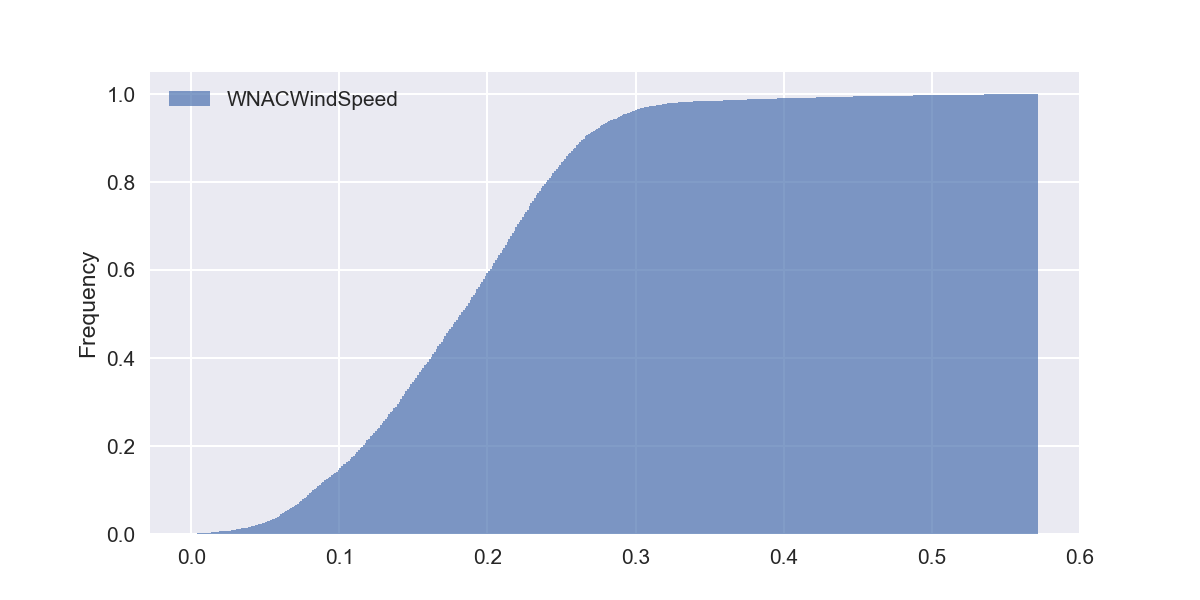

<IPython.core.display.Javascript object>


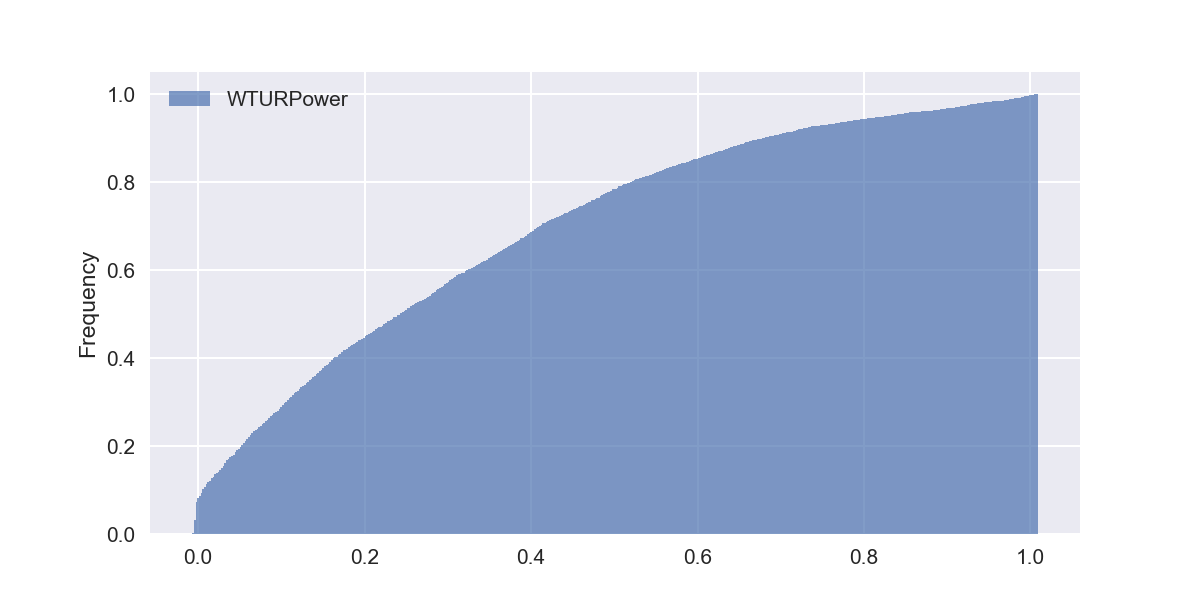

In [65]:
col1=['WNACWindSpeed']
col2 = ['WTURPower']
df=df5.copy()
#df.loc[df.index>'2015-05-05','WTURPower']=0
df[col1].plot.hist(alpha=0.7, bins=500,figsize=(8,4), cumulative=True, normed=True);
df[col2].plot.hist(alpha=0.7, bins=500,figsize=(8,4), cumulative=True, normed = True);

### ASSET signal - MEAN Signal

In [ ]:
for item in ALL2[0:2]:
    #col = ['WNACWindSpeed','WTURPower']
    fig, ((ax1, ax2),( ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize=(9,5), sharex=True, sharey=True )
    (df1[item]-df6[item]).plot( ax=ax1)
    #ax1.set_ylabel('Units')
    ax1.set_title(item)
    (df2[item]-df6[item]).plot( ax=ax2)
    (df3[item]-df6[item]).plot( ax=ax3)
    (df4[item]-df6[item]).plot( ax=ax4)
    (df5[item]-df6[item]).plot( ax=ax5)
    (df6[item]-df6[item]).plot( ax=ax6)

In [ ]:
# ALL ASSET SIGNALS

In [ ]:
for item in ALL2[0:2]:
    #col = ['WNACWindSpeed','WTURPower']
    fig, ((ax1, ax2),( ax3, ax4),( ax5, ax6)) = plt.subplots(3, 2, figsize=(9,5), sharex=True, sharey=True )
    (df1[item]).plot( ax=ax1)
    #ax1.set_ylabel('Units')
    ax1.set_title(item)
    (df2[item]).plot( ax=ax2)
    (df3[item]).plot( ax=ax3)
    (df4[item]).plot( ax=ax4)
    (df5[item]).plot( ax=ax5)
    (df6[item]).plot( ax=ax6)

### BOXPLOT Group by asset

<IPython.core.display.Javascript object>


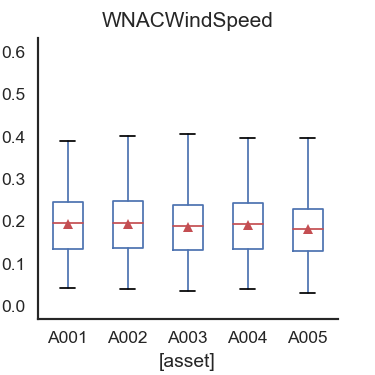

In [49]:
# BOXPLOT GROUPBY ASSET
sensors = dfall.columns.tolist()
for sensor in sensors[0:1]:
    fig, ax = plt.subplots( figsize=(3, 3))
    dfall[[sensor, 'asset']].boxplot(by='asset', ax=ax, showmeans=True, whis=[1, 99], sym='.')
    ax.set_title(sensor)
    #ax.suptitle=''
    ax.yaxis.grid(False)
    ax.xaxis.grid(False)
    fig.suptitle('')
    #sfig('bp-'+sensor)

<IPython.core.display.Javascript object>


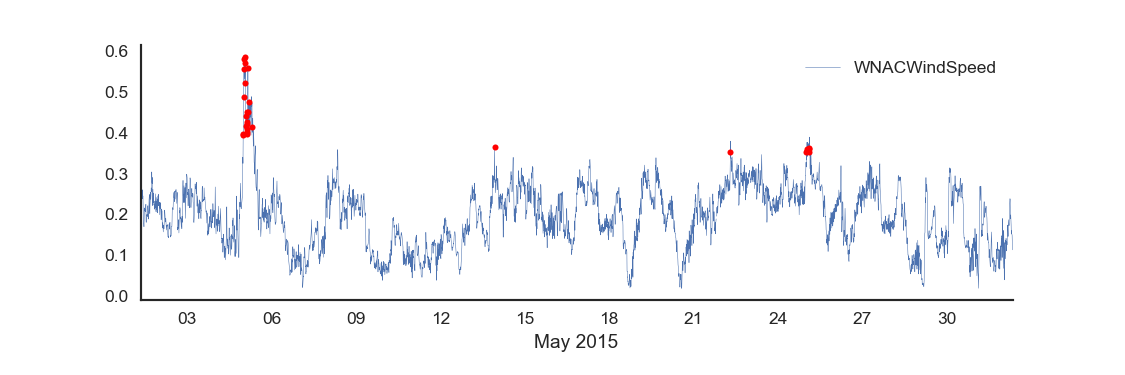

In [26]:
import matplotlib.dates as mdates

dfA= df2.copy()
dfB = dfA[(dfA.WTURPower<0.95)&(dfA.WNACWindSpeed>0.35)]
item1 = 'WNACWindSpeed'

fig, (ax1) = plt.subplots( figsize=(9,3) )

dfA[item1].plot(ax=ax1, lw=.3, legend=item1)

dfB[item1].plot(style='r.-', lw=0, ax=ax1)

#ax1.set_title(item1)
#ax1.set_ylabel(item1)
#ax1.spines['bottom'].set_color('none')

myFmt = mdates.DateFormatter('%d')
ax1.xaxis.set_major_formatter(myFmt)
ax1.set_xlabel('May 2015')

plt.setp( ax1.xaxis.get_majorticklabels(), rotation=0 );

#sfig('filteredwind')

In [ ]:
NAC = ['WNACWindSpeed','WNACDirection','WNACWindDirection','WNACAmbTemp','WNACNacelleTemp']
GEN = ['WGENPhase1Temp','WGENPhase2Temp','WGENPhase3Temp',
        'WGENGenSpeed','WGENBearNDETemp','WGENBearDETemp']
ROT = ['WROTPitchAngleSP','WROTSpeed','WROTPitchAngleAvg']
GDC = ['WGDCTrafoPhase1Temp','WGDCTrafoPhase2Temp','WGDCTrafoPhase3Temp']
TUR = ['WTURReactivePower','WTURReactivePowerAux','WTURPowerAux','WTURPower']
HDR = ['WHDRGroupOilPress','WHDRGroupOilTemp']
TRM = ['WTRMOilTemp','WTRMBearTemp']
YAW = ['WYAWPressure']
CNV = ['WCNVCosPhi','WCNVNetVoltage']
TEMPS = ['WNACAmbTemp','WNACNacelleTemp','WGENPhase1Temp','WGENBearNDETemp','WGENBearDETemp', 
         'WGDCTrafoPhase1Temp','WHDRGroupOilTemp' ,'WTRMOilTemp','WTRMBearTemp' ]

<IPython.core.display.Javascript object>


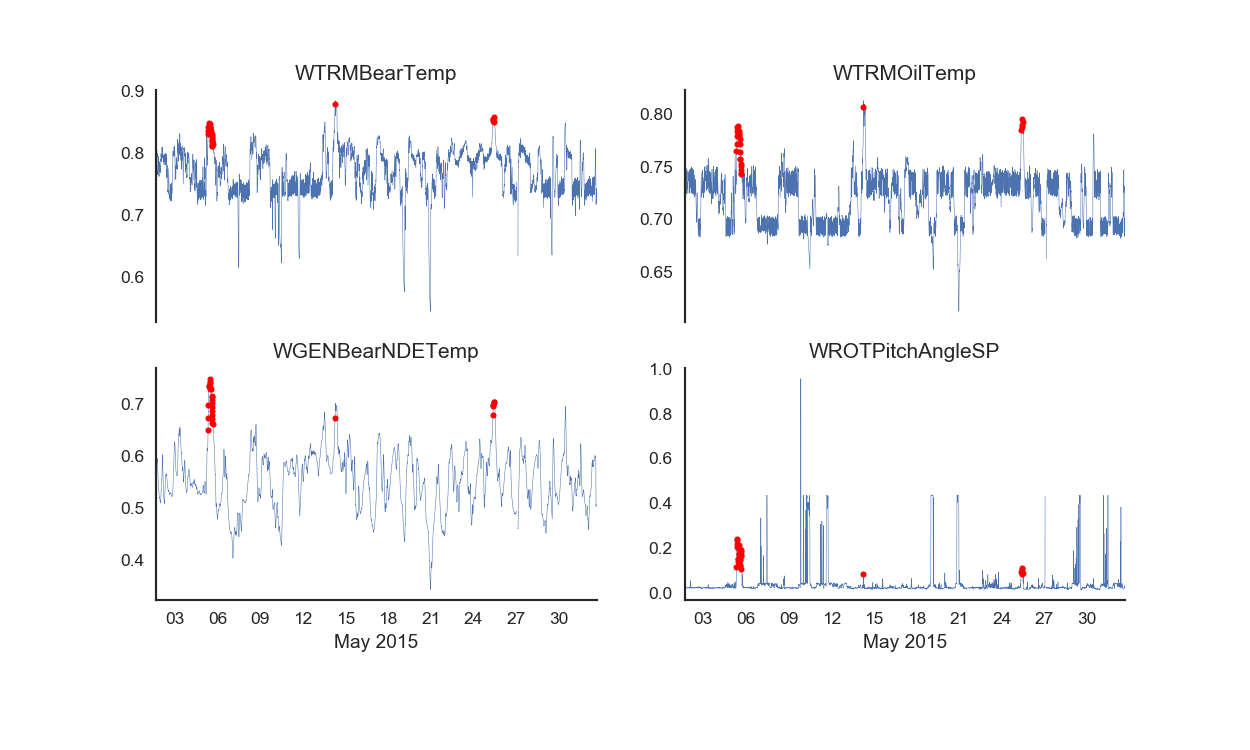

In [247]:
import matplotlib.dates as mdates


dfA= df1.copy()
dfB = dfA[(dfA.WTURPower<0.95)&(dfA.WNACWindSpeed>0.35)]

#item1 = 'WGENPhase1Temp'
#item1 = 'WGENBearDETemp'
#item2 = 'WHDRGroupOilTemp'

item1 = 'WTRMBearTemp'
item2 = 'WTRMOilTemp'
item3 = 'WGENBearNDETemp'
item4 = 'WROTPitchAngleSP'


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(10,6) )

dfA[item1].plot(ax=ax1, lw=.3)#, legend=item1)
dfA[item2].plot(ax=ax2, lw=.3)#, legend=item2)
dfA[item3].plot(ax=ax3, lw=.3)#, legend=item3)
dfA[item4].plot(ax=ax4, lw=.3)#, legend=item4)
#dfA[item5].plot(ax=ax5, lw=.3)#, legend=item3)
#dfA[item6].plot(ax=ax6, lw=.3)#, legend=item4)

dfB[item1].plot(style='r.-', lw=0, ax=ax1, legend='')
dfB[item2].plot(style='r.-', lw=0, ax=ax2, legend='')
dfB[item3].plot(style='r.-', lw=0, ax=ax3, legend='')
dfB[item4].plot(style='r.-', lw=0, ax=ax4, legend='')
#dfB[item5].plot(style='r.-', lw=0, ax=ax5, legend='')
#dfB[item6].plot(style='r.-', lw=0, ax=ax6, legend='')


#ax1.set_ylabel(item1)
#ax2.set_ylabel(item2)
#ax3.set_ylabel(item3)
#ax4.set_ylabel(item4)

ax1.set_title(item1)
ax2.set_title(item2)
ax3.set_title(item3)
ax4.set_title(item4)
#ax5.set_title(item5)
#ax6.set_title(item6)

ax1.spines['bottom'].set_color('none')
ax2.spines['bottom'].set_color('none')
#ax3.spines['bottom'].set_color('none')
#ax4.spines['bottom'].set_color('none')


myFmt = mdates.DateFormatter('%d')
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_xlabel('May 2015')
ax4.xaxis.set_major_formatter(myFmt)
ax4.set_xlabel('May 2015')

plt.setp( ax3.xaxis.get_majorticklabels(), rotation=0 )
plt.setp( ax4.xaxis.get_majorticklabels(), rotation=0 )

sfig('suboptimalseries')

<IPython.core.display.Javascript object>


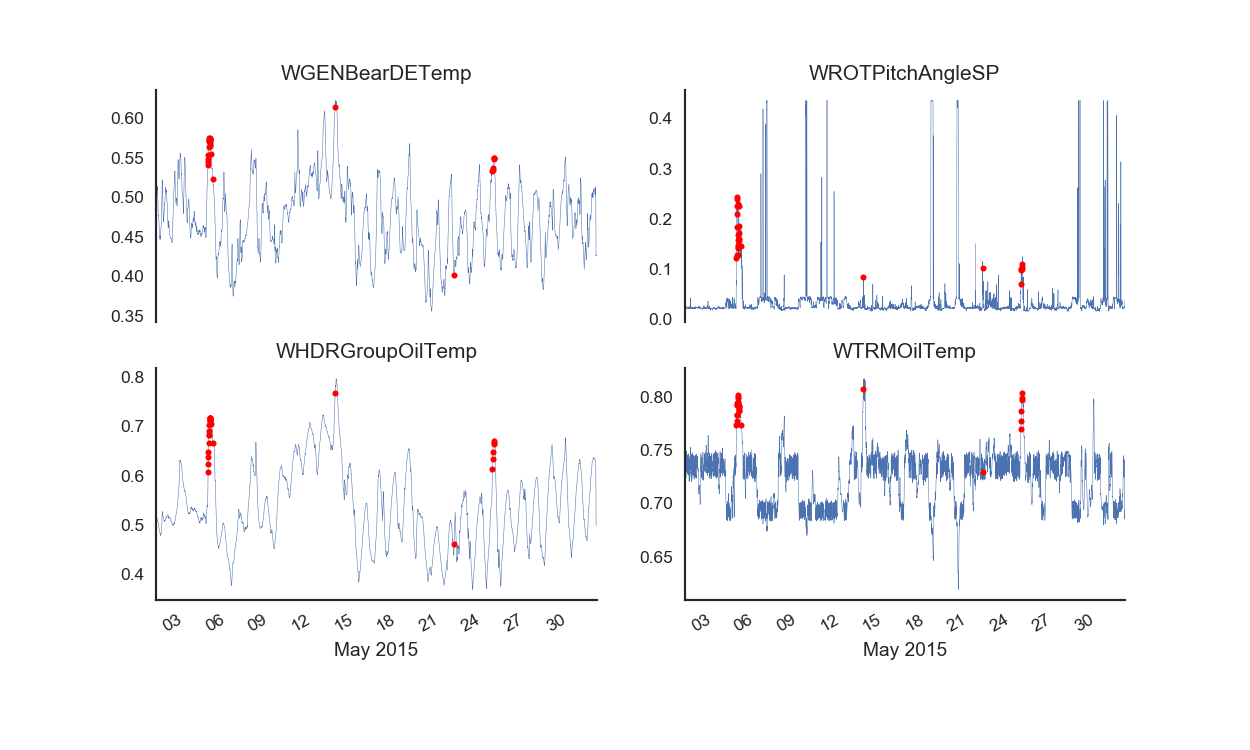

In [235]:
import matplotlib.dates as mdates


dfA= df2.copy()
dfB = dfA[(dfA.WTURPower<0.95)&(dfA.WNACWindSpeed>0.35)]


item1 = 'WGENBearDETemp'
item2 = 'WROTPitchAngleSP'
item3 = 'WHDRGroupOilTemp'
item4 = 'WTRMOilTemp'

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, sharex=True, figsize=(10,6) )

dfA[item1].plot(ax=ax1, lw=.3)#, legend=item1)
dfA[item2].plot(ax=ax2, lw=.3)#, legend=item2)
dfA[item3].plot(ax=ax3, lw=.3)#, legend=item3)
dfA[item4].plot(ax=ax4, lw=.3)#, legend=item4)

dfB[item1].plot(style='r.-', lw=0, ax=ax1, legend='')
dfB[item2].plot(style='r.-', lw=0, ax=ax2, legend='')
dfB[item3].plot(style='r.-', lw=0, ax=ax3, legend='')
dfB[item4].plot(style='r.-', lw=0, ax=ax4, legend='')

#ax1.set_ylabel(item1)
#ax2.set_ylabel(item2)
#ax3.set_ylabel(item3)
#ax4.set_ylabel(item4)

ax1.set_title(item1)
ax2.set_title(item2)
ax3.set_title(item3)
ax4.set_title(item4)


ax1.spines['bottom'].set_color('none')
ax2.spines['bottom'].set_color('none')

myFmt = mdates.DateFormatter('%d')
ax3.xaxis.set_major_formatter(myFmt)
ax3.set_xlabel('May 2015')
ax4.xaxis.set_major_formatter(myFmt)
ax4.set_xlabel('May 2015')



#sfig('series')

## power curve per asset in same figure

### PAIR SCATTER PLOTS

In [ ]:
HCOR = ['WNACWindSpeed','WGENGenSpeed','WROTSpeed','WTURPower','WTURReactivePower','WCNVCosPhi'  ]
sns.set(style="ticks")
#fig, ax = plt.subplots( figsize=(9, 9))
#sns.set(style="white")
df=df6[HCOR]
sns.pairplot(df, diag_kind='hist', markers='.', size=2)
#sfig('pariplot')

## POWER CURVE ZOOM to detect sub optimal points

<IPython.core.display.Javascript object>


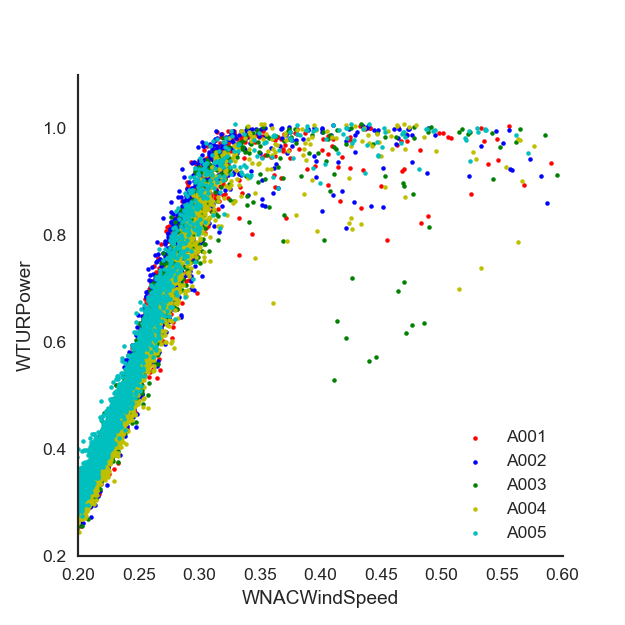

In [194]:
fig, (ax1) = plt.subplots( sharex=True, sharey=True,figsize=(5,5) )
#ax = fig.add_subplot(5,1,5)
#ax.set_xlabel('Date')
#ax.set_ylabel('Units')
#ax.set_title('WT performance')
ax1.set_ylim([0.2,1.1])
ax1.set_xlim([0.2,0.6])
df1.plot.scatter('WNACWindSpeed', 'WTURPower', c='r', ax=ax1, marker='.', label='A001')
df2.plot.scatter('WNACWindSpeed', 'WTURPower', c='b', ax=ax1, marker='.', label='A002')
df3.plot.scatter('WNACWindSpeed', 'WTURPower', c='g', ax=ax1, marker='.', label='A003')
df4.plot.scatter('WNACWindSpeed', 'WTURPower', c='y', ax=ax1, marker='.', label='A004')
df5.plot.scatter('WNACWindSpeed', 'WTURPower', c='c', ax=ax1, marker='.', label= 'A005')
#sfig('pcurvezoom');

In [ ]:
fig, ax = plt.subplots( figsize=(8, 3))
y = 'WNACAmbTemp'
df6.boxplot(y, by=df6.index.day, ax=ax, rot=0, fontsize=8, showmeans=True)
ax.set_title('WNAC Ambient Temperature variation in May 2015')
fig.suptitle('')
ax.set_xlabel("Day");

## DAILY MEASUREMENTS

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 3))
x=df6.index.dayofyear-120
sns.boxplot(x, df6.WNACAmbTemp, ax=ax);

<IPython.core.display.Javascript object>


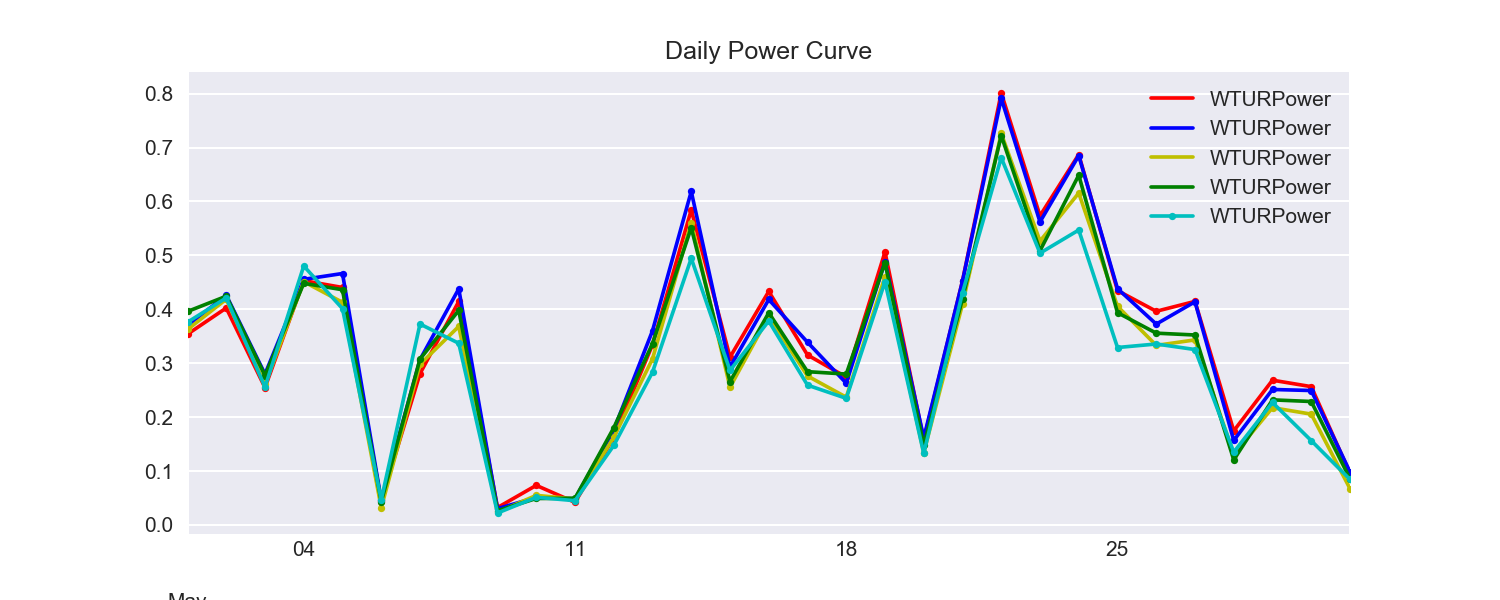

In [41]:
col = ['WTURPower']
fig, ax = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(10,4))
dfd1[col].plot(color ='r', marker ='.', ax=ax);
dfd2[col].plot( color ='b', marker ='.', ax=ax);
dfd3[col].plot( color ='y', marker ='.', ax=ax);
dfd4[col].plot( color ='g', marker ='.', ax=ax);
dfd5[col].plot( color ='c', marker ='.', ax=ax);
ax.set_title('Daily Power Curve');

### KDE Distributions

In [ ]:
# With LAbels
sensors = dfall.columns.tolist()
for sensor in sensors[0:28]:
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.kdeplot(df1[sensor], label='A001')
    sns.kdeplot(df2[sensor], label='A002')
    sns.kdeplot(df3[sensor], label='A003')
    sns.kdeplot(df4[sensor], label='A004')
    sns.kdeplot(df5[sensor], label='A005')   
    ax.set_title(sensor)
    #sfig(sensor)

In [ ]:
# No LAbels
mystyle()
sensors = dfall.columns.tolist()
for sensor in sensors[0:28]:
    fig, ax = plt.subplots(figsize=(3, 2))
    sns.kdeplot(df1[sensor], label="")
    sns.kdeplot(df2[sensor], label="")
    sns.kdeplot(df3[sensor], label="")
    sns.kdeplot(df4[sensor], label="")
    sns.kdeplot(df5[sensor], label="")   
    ax.set_title(sensor)
    sfig('kde-'+sensor)

## Plot all columns in dataframe as time series

In [ ]:
NAC = ['WNACWindSpeed','WNACDirection','WNACWindDirection','WNACAmbTemp','WNACNacelleTemp']
GEN = ['WGENPhase1Temp','WGENPhase2Temp','WGENPhase3Temp',
        'WGENGenSpeed','WGENBearNDETemp','WGENBearDETemp']
ROT = ['WROTPitchAngleSP','WROTSpeed','WROTPitchAngleAvg']
GDC = ['WGDCTrafoPhase1Temp','WGDCTrafoPhase2Temp','WGDCTrafoPhase3Temp']
TUR = ['WTURReactivePower','WTURReactivePowerAux','WTURPowerAux','WTURPower']
HDR = ['WHDRGroupOilPress','WHDRGroupOilTemp']
TRM = ['WTRMOilTemp','WTRMBearTemp'] 
YAW = ['WYAWPressure']
CNV = ['WCNVCosPhi','WCNVNetVoltage']
ASS = ['asset']
df = df1.copy()
COL = NAC+GEN+ROT+GDC+TUR+HDR+TRM+YAW
df[COL].plot(subplots=True, figsize=(8,50));

<IPython.core.display.Javascript object>


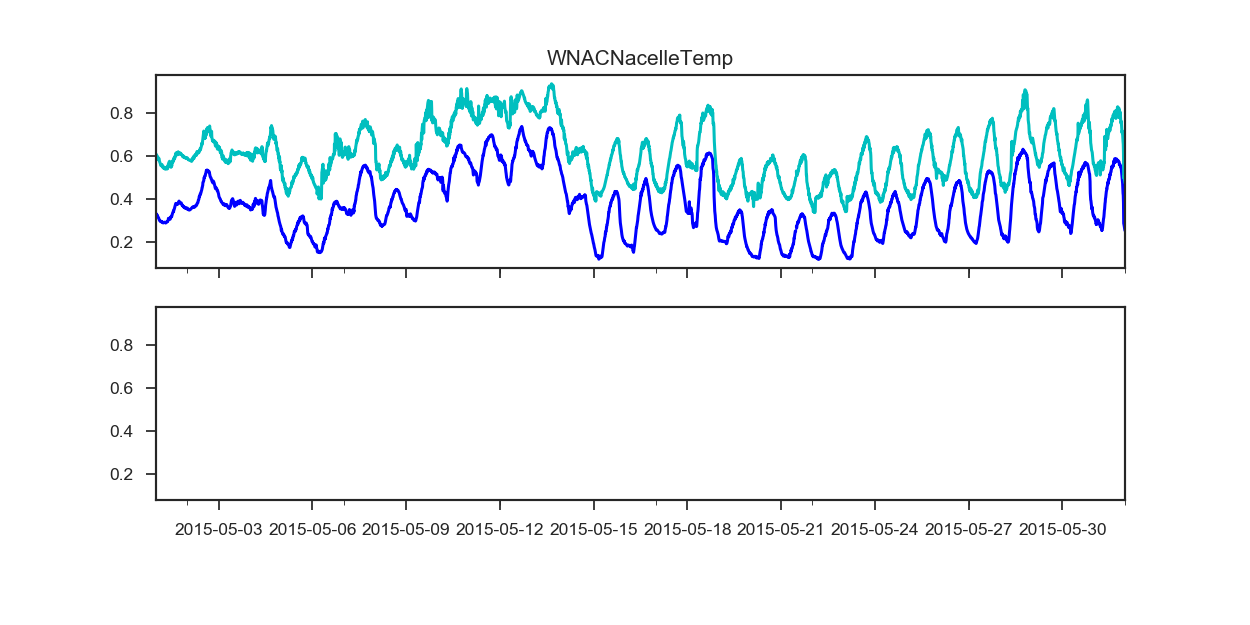

In [56]:
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(10,5), sharex=True, sharey=True )
colors = ['b','c']
for idx , item in enumerate (['WNACAmbTemp','WNACNacelleTemp']):
    df2[item].plot(color =colors[idx], ax=ax1, label=item)
    #ax1.set_ylabel('Units')
    ax1.set_title(item)

### Ambien and Nacelle Temperature

<IPython.core.display.Javascript object>


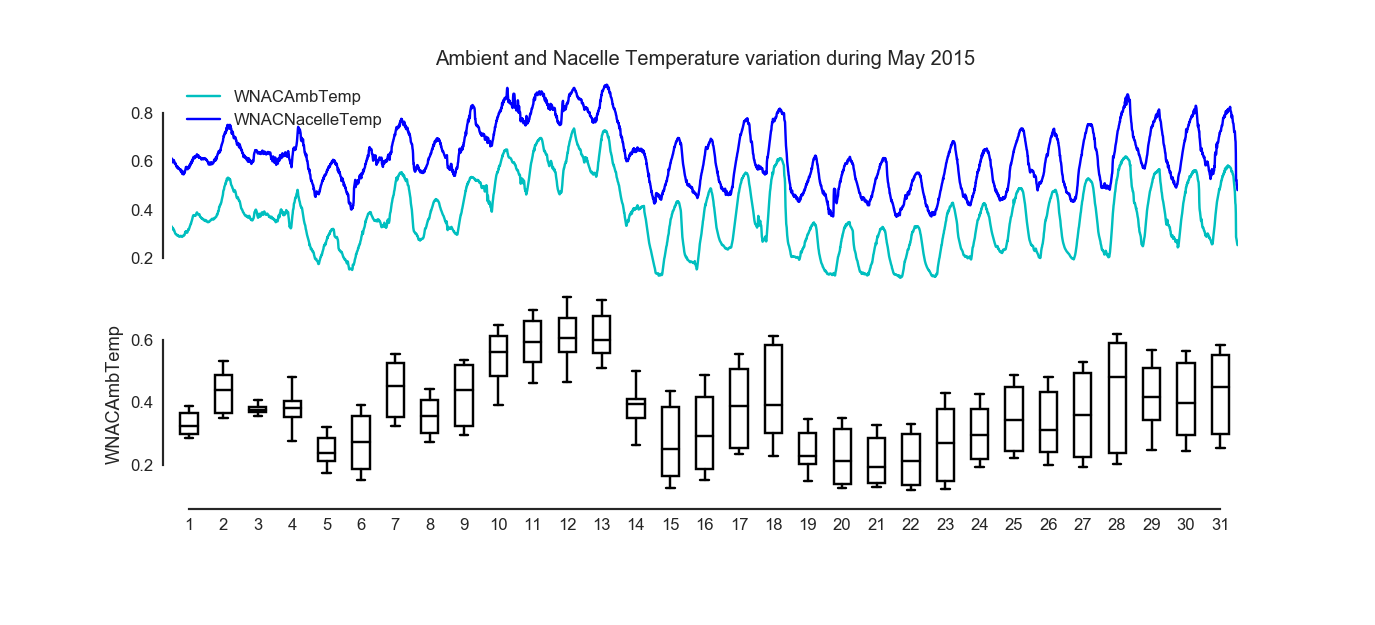

In [82]:
a = ['WNACAmbTemp']
b = ['WNACNacelleTemp']
df=df6

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(11,5))
plt.subplots_adjust(hspace = .001)

df.plot(x=df.index, y=a, color ='c', ax=ax1);
df.plot(x=df.index, y=b, color ='b', ax=ax1);
ax1.set_title('Ambient and Nacelle Temperature variation during May 2015');
ax1.set_xlabel('')
ax1.set_xticklabels([])
ax1.spines['bottom'].set_color('none')

x = df.index.day
y = df6.WNACAmbTemp
sns.boxplot(x,y , ax=ax2, color='white', width=.5, fliersize=0)
ax2.set_title('')
ax2.set_xlabel('')



# figure styles
sns.set_style('white')
sns.set_context('paper', font_scale=1.2)
#sns.set_style('ticks', {'axes.edgecolor': '0', 'xtick.color': '0', 'ytick.color': '0'})
sns.despine(offset=5, trim=True)
plt.setp(ax2.artists, edgecolor = 'k', facecolor='w')
plt.setp(ax2.lines, color='k');

#sfig('TempVar')

Cp vs Turbine Tip Speed Curve

In [ ]:
df=df1.copy()
df['Cp']=df['WTURPower']/(df['WNACWindSpeed']**3)
df['Cp']= df['Cp']/df['Cp'].max()
df['lambda']=df['WROTSpeed']/df['WNACWindSpeed']
df['lambda']= df['lambda']/df['lambda'].max()
L = 'lambda'
Ws = 'WNACWindSpeed'
Cp = 'Cp'
fig, ax1 = plt.subplots(1, 1, sharex=True, sharey=True,figsize=(10,4) )
df.plot.scatter(L,Cp , ax=ax1, marker='.');
#ax1.set_xlabel('WNACWindSpeed')
#ax1.set_ylabel('WROTSpeed')
ax1.set_title('Asset')
ax1.set_ylim(-.25, 1);
sfig()


<IPython.core.display.Javascript object>


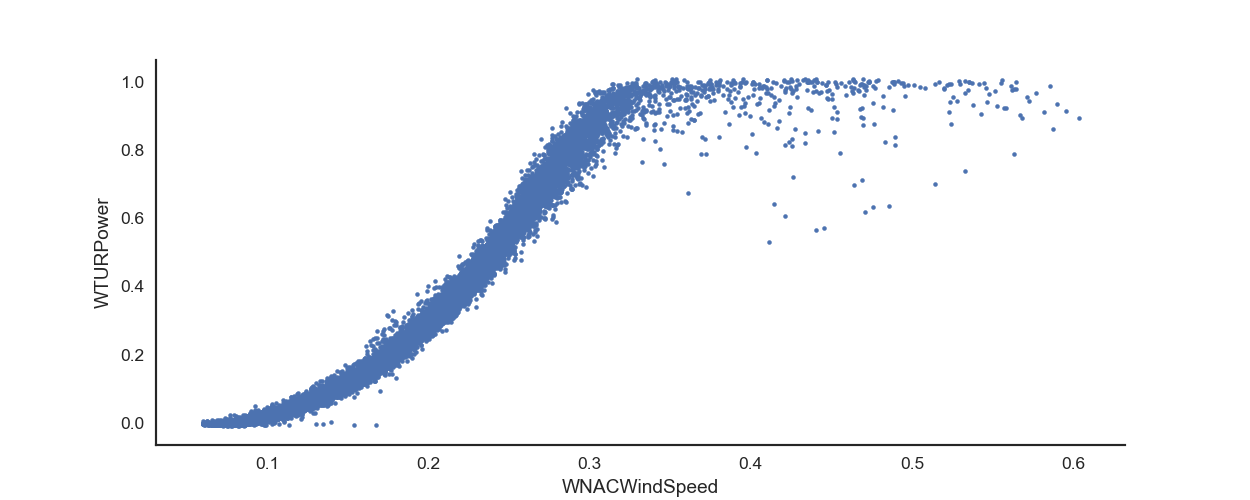

In [169]:
df=dfall.copy()
#df=df[(df.WNACWindSpeed>0.06) & (df.WNACWindSpeed<0.50)]
df=df[df.WNACWindSpeed>0.06]
p = np.polyfit(df['WNACWindSpeed'], df['WTURPower'], 10)
Pfit = np.poly1d(p)
df['Pfit'] = Pfit(df['WNACWindSpeed'])

#s = UnivariateSpline(df['WNACWindSpeed'], df['WTURPower'], s=10)
#df['SPlin'] = s(df['WNACWindSpeed'])


y = 'WTURPower'
x = 'WNACWindSpeed'
z1 = 'Pfit'
#z2 = 'SPlin'

fig, ax1 = plt.subplots(figsize=(10,4) )
df.plot.scatter(x, y ,ax=ax1, marker='.')
#df.plot.scatter(x, z1 ,ax=ax1, marker='.', color='r')

#ax1.set_xlabel('WNACWindSpeed')
#ax1.set_ylabel('WROTSpeed')
#ax1.set_title('Asset')
#ax1.set_ylim(-.25, 1);

In [166]:
def sfig(figname='myfig'):
    
    name = figname+'.png'
    path = r'C:\Home00Ser\Python\NEM Challenge\Report\Figs'
    fname = os.path.join(path,name)

    plt.savefig(fname, dpi=900, facecolor='w', edgecolor='w',
            orientation='portrait', papertype=None, format=None,
            transparent=False, bbox_inches='tight', pad_inches=0.1,
            frameon=None)
    #plt.close()

In [22]:
mystyle()

In [21]:
def mystyle():
    
    
    plt.style.use('seaborn-white')
    plt.rcParams ['axes.grid']=False 
    plt.rcParams ['axes.spines.left']   = True   # display axis spines
    plt.rcParams ['axes.spines.bottom'] = True
    plt.rcParams ['axes.spines.top']    = False
    plt.rcParams ['axes.spines.right']  = False
    
    
    #plt.style.use('ggplot')
    #mpl.rcParams['font.size'] = 12
    #mpl.rcParams['legend.fontsize'] = 'large'
    #mpl.rcParams['figure.titlesize'] = 'medium'
    #mpl.rcParams['grid.color'] = 'k'
    #mpl.rcParams['grid.linestyle'] = ':'
    #mpl.rcParams['grid.linewidth'] = 0.5
    #plt.rcParams['axes.facecolor'] = 'white'
    
    ### AXES
    # default face and edge color, default tick sizes,
    # default fontsizes for ticklabels, and so on.  See
    # http://matplotlib.org/api/axes_api.html#module-matplotlib.axes
    #axes.facecolor      : white   # axes background color
    #axes.edgecolor      : black   # axes edge color
    #axes.linewidth      : 0.8     # edge linewidth
    #axes.grid           : False   # display grid or not
    #axes.titlesize      : large   # fontsize of the axes title
    #axes.titlepad       : 6.0     # pad between axes and title in points
    #axes.labelsize      : medium  # fontsize of the x any y labels
    #axes.labelpad       : 4.0     # space between label and axis
    #axes.labelweight    : normal  # weight of the x and y labels
    #axes.labelcolor     : black
    #axes.axisbelow      : 'line'  # draw axis gridlines and ticks below
                                   # patches (True); above patches but below
                                   # lines ('line'); or above all (False)

    #axes.formatter.limits : -7, 7 # use scientific notation if log10
                                   # of the axis range is smaller than the
                                   # first or larger than the second
    #axes.formatter.use_locale : False # When True, format tick labels
                                       # according to the user's locale.
                                       # For example, use ',' as a decimal
                                       # separator in the fr_FR locale.
    #axes.formatter.use_mathtext : False # When True, use mathtext for scientific
                                         # notation.
    #axes.formatter.useoffset      : True    # If True, the tick label formatter
                                             # will default to labeling ticks relative
                                             # to an offset when the data range is
                                             # small compared to the minimum absolute
                                             # value of the data.
    #axes.formatter.offset_threshold : 4     # When useoffset is True, the offset
                                             # will be used when it can remove
                                             # at least this number of significant
                                             # digits from tick labels.

    # axes.spines.left   : True   # display axis spines
    # axes.spines.bottom : True
    # axes.spines.top    : True
    # axes.spines.right  : True

    #axes.xmargin        : .05  # x margin.  See `axes.Axes.margins`
    #axes.ymargin        : .05  # y margin See `axes.Axes.margins`
